In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="ticks")

In [ ]:
original_abandono = pd.read_csv('/content/HR_Abandono_2021(4).csv', sep=';', decimal=',', index_col=0)
original_abandono.columns = [col.lower() for col in original_abandono.columns]
abandono = original_abandono.copy()
abandono = abandono[[col for col in abandono.columns if not col=='left'] + ['left']]
abandono.sample(10)

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,work_accident,promotion_last_5years,salary,num_project,depto,left
id,,,,,,,,,,
3894,0.67,0.95,241,4,0,0,medium,4,accounting,0
3635,0.58,0.97,265,3,0,0,medium,3,support,0
6706,0.63,0.79,206,5,0,0,low,2,product_mng,0
11276,0.56,0.71,211,6,0,1,low,3,marketing,0
296,0.38,0.51,146,3,0,0,medium,2,IT,1
8030,0.35,0.37,153,2,0,0,medium,4,sales,0
14708,0.10,0.82,244,4,0,0,medium,6,technical,1
7657,0.53,0.71,125,2,1,0,low,3,sales,0
6739,0.71,0.83,206,3,0,0,low,5,sales,0


In [ ]:
abandono['time_spend_company'] = abandono['time_spend_company'].astype('str')
abandono['work_accident'] = abandono['work_accident'].astype('str')
abandono['promotion_last_5years'] = abandono['promotion_last_5years'].astype('str')
abandono['num_project'] = abandono['num_project'].astype('str')

In [ ]:
abandono.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
average_montly_hours,14999.0,201.183679,50.887078,96.00,156.00,200.00,245.00,808.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0


In [ ]:
abandono.isna().sum()

satisfaction_level       0
last_evaluation          0
average_montly_hours     0
time_spend_company       0
work_accident            0
promotion_last_5years    0
salary                   0
num_project              0
depto                    0
left                     0
dtype: int64

#1) Introdução

##a) Qual o objetivo desse estudo

Estimar, a partir de variáveis preditoras, se um dado funcionário irá sair da empresa ou não, esse tipo de estuddo é conhecido como análise de churn.

##b) Porque nesse estudo é indicado utilizar técnicas supervisionadas de classificação

Pois foi forncecido um dataset com uma base histórica dos funcionários que já sairam da empresa e suas características, portanto esse dataset torna possível a estimação de uma função que prediz se um dado funcionário irá ou não sair da empresa

##c) Classifique as variáveis: dependentes e independentes(preditoras)

In [ ]:
vars = {col: 'Independente' if col == 'left' else 'Dependente' for col in abandono}

pd.DataFrame(data=vars.values(), index=vars.keys(), columns=['Tipo']).sort_values(by='Tipo')

,Tipo
satisfaction_level,Dependente
last_evaluation,Dependente
average_montly_hours,Dependente
time_spend_company,Dependente
work_accident,Dependente
promotion_last_5years,Dependente
salary,Dependente
num_project,Dependente
depto,Dependente
left,Independente


##2) Faça uma análise descritiva de todas as variáveis com a variável "target" separada em dois blocos

##a) Variáveis preditoras numéricas/quantitativas (sempre colocando uma pequena interpretação dos resultados)

In [ ]:
abandono.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 1 to 14999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   average_montly_hours   14999 non-null  int64  
 3   time_spend_company     14999 non-null  object 
 4   work_accident          14999 non-null  object 
 5   promotion_last_5years  14999 non-null  object 
 6   salary                 14999 non-null  object 
 7   num_project            14999 non-null  object 
 8   depto                  14999 non-null  object 
 9   left                   14999 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 1.3+ MB


In [ ]:
from pandas.api.types import is_numeric_dtype

is_numeric_dtype(abandono.left)
quant_abandono = abandono[[col for col in abandono.columns if is_numeric_dtype(abandono[col])]]
quant_abandono.sample(10)

,satisfaction_level,last_evaluation,average_montly_hours,left
id,,,,
5226,0.33,0.94,166,0
13167,0.83,0.99,132,0
9574,0.93,0.78,191,0
13561,0.95,0.90,221,0
948,0.39,0.56,135,1
11976,0.59,0.77,272,0
8604,0.53,0.49,192,0
9384,0.41,0.63,263,0
113,0.43,0.52,160,1


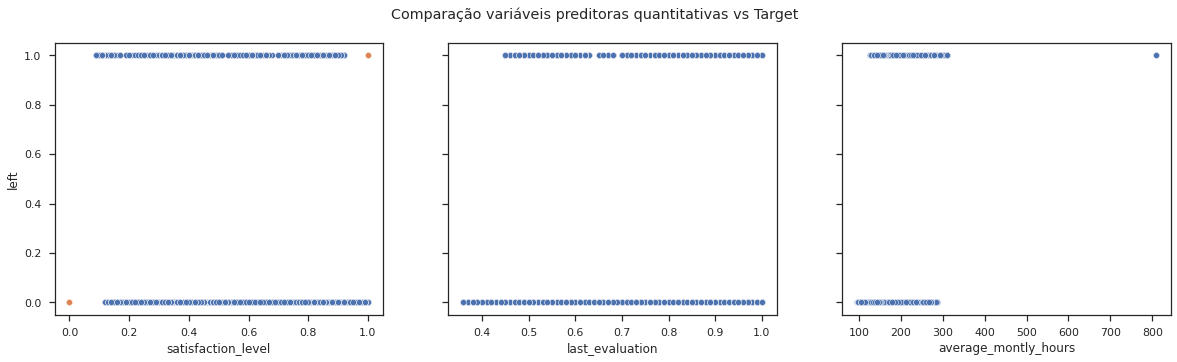

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=True)
fig.suptitle('Comparação variáveis preditoras quantitativas vs Target')

for idx, col in enumerate(quant_abandono.columns):
    sns.scatterplot(ax=axes[idx%3], x=quant_abandono[col], y=quant_abandono['left'])

##b) Variáveis preditoras categóricas/classes (sempre colocando uma pequena interpretação dos resultados)

In [ ]:
from pandas.api.types import is_string_dtype

cat_abandono = abandono[[col for col in abandono.columns if (is_string_dtype(abandono[col]) or col=='left')]]

cat_abandono.sample(10)

,time_spend_company,work_accident,promotion_last_5years,salary,num_project,depto,left
id,,,,,,,
3512,3,0,0,low,3,sales,0
7299,4,0,0,medium,2,support,0
4779,3,0,0,medium,3,support,0
4543,2,1,1,medium,4,technical,0
1181,5,0,0,low,5,technical,1
10603,3,0,0,low,3,IT,0
4929,2,0,0,medium,3,technical,0
3014,2,0,0,low,3,technical,0
770,3,0,0,medium,2,marketing,1


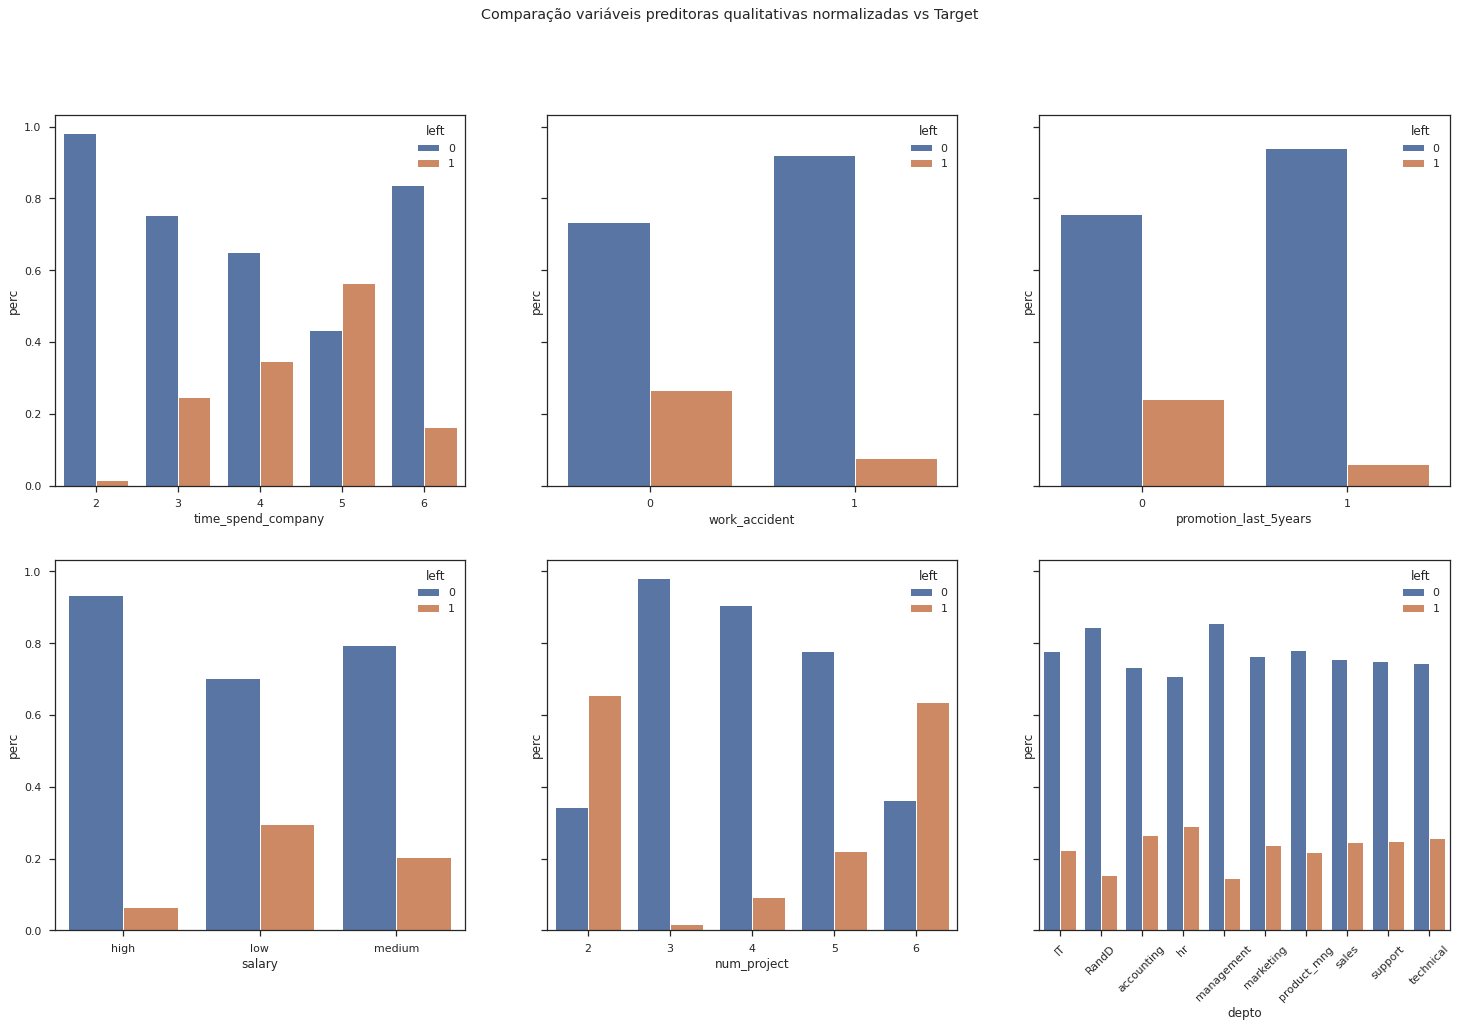

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(25, 15), sharey=True)
plt.xticks(rotation=45)
fig.suptitle('Comparação variáveis preditoras qualitativas normalizadas vs Target')


for idx, col in enumerate(cat_abandono.columns):
  if col == 'left':
    break
  elif not col == 'depto': 
    norm = cat_abandono.groupby(by=[col,'left']).apply(lambda g: g.count())
    norm1 = norm['depto'].groupby(by=col, axis=0).apply(lambda g: g/g.sum())
    norm1 = norm1.reset_index(drop=False)
    norm1.rename(columns={'depto': 'perc'}, inplace=True)
    sns.barplot(ax=axes[int(idx/3), idx%3], x=norm1[col], y=norm1['perc'], hue=norm1['left'])
  elif col == 'depto': 
    norm_salary = cat_abandono.groupby(by=[col,'left']).apply(lambda g: g.count())
    norm_salary1 = norm_salary['salary'].groupby(by=col, axis=0).apply(lambda g: g/g.sum())
    norm_salary1 = norm_salary1.reset_index(drop=False)
    norm_salary1.rename(columns={'salary': 'perc'}, inplace=True)
    sns.barplot(ax=axes[int(idx/3), idx%3], x=norm_salary1[col], y=norm_salary1['perc'], hue=norm_salary1['left'])




Análise gráfica descritiva:
*   Tempo de companhia
        A probabilidade de sair da empresa aumenta com o passar do tempo porém diminui a partir do sexto ano.
*   Acidente de trabalho
        A probabilidade do funcionário sair diminui se ele já se acidentou.
*   Promoção nos últimos 5 anos
        A probabilidade de sair diminui se o funcionário recebeu uma promoção nos últimos 5 anos
*   Salário
        Funcionários com salários baixos tem maior chance de sair, aqueles com salários altos, maior chance de permanecer.
*   Quantidade de projetos
        Funcionários tendem a sair antes do ínicio do terceiro projeto, após esse período, as chances de sair aumentam com a conclusão de cada projeto.  
*   Departamento
        O departamento com maior número de funcionários que deixam a empresa é o de RH, seguido por contabilidade O departamento com menor vazão é o gerencial.



##c) Qual variável precisa ser feita alguma transformação. Quais? Coloque tabelas ou gráficos dessas novas variáveis transformadas.

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



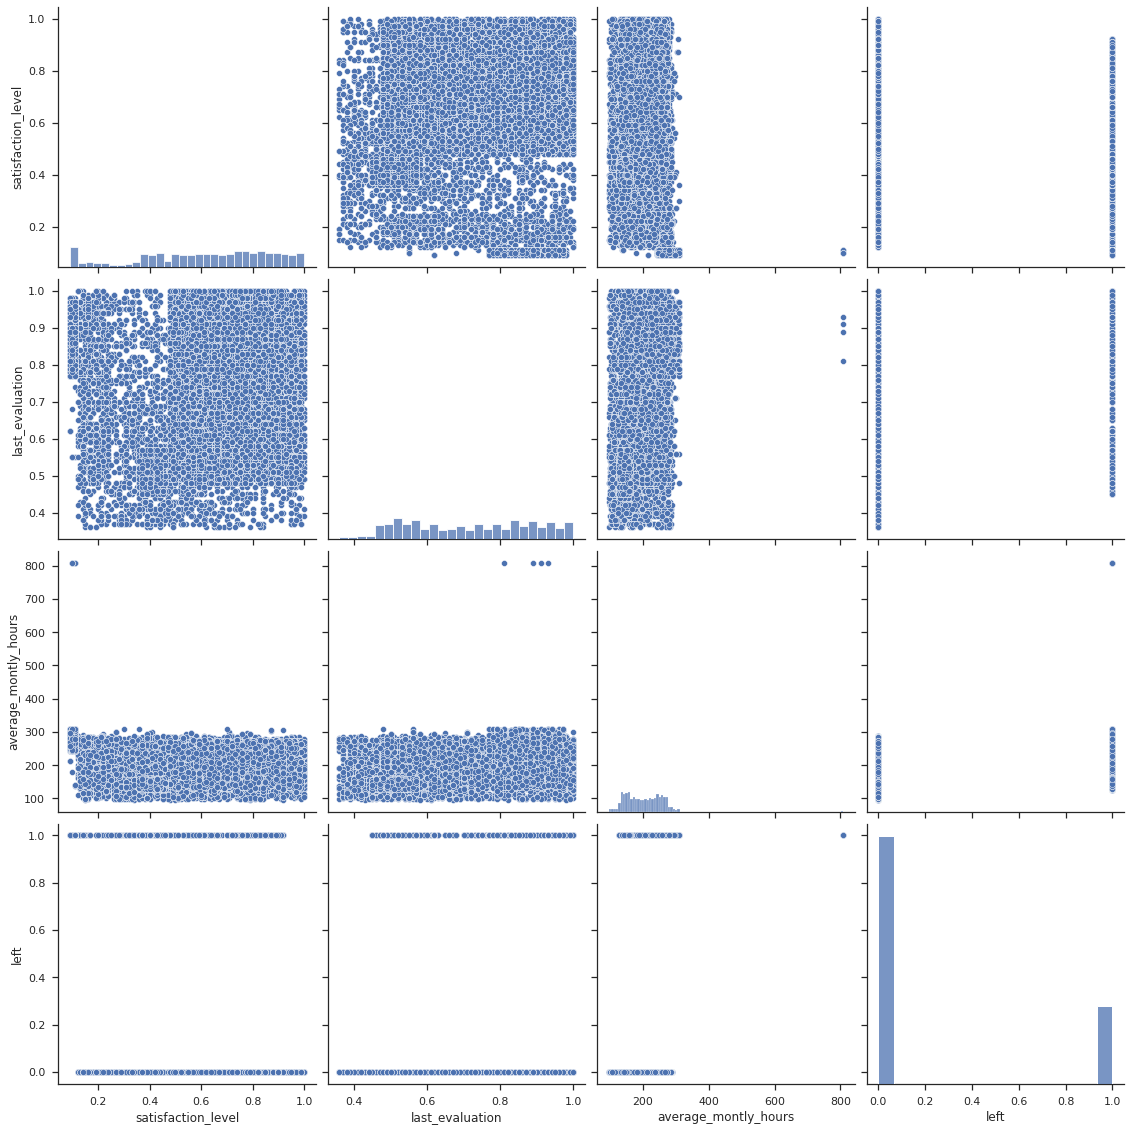

In [ ]:
sns.pairplot(quant_abandono, size=4)

In [ ]:
from scipy.stats import normaltest

for col in quant_abandono.columns:
    stat, p = normaltest(quant_abandono[col])
    res = 'normal' if p<0.05 else 'não normal'
    print(f'Valor p: {p}, Estatistica: {stat}, Teste: {res}')

Valor p: 1.6412924703269606e-261, Estatistica: 1200.9584504966565, Teste: normal
Valor p: 0.0, Estatistica: 19704.806926419373, Teste: normal
Valor p: 0.0, Estatistica: 1954.6228113951915, Teste: normal
Valor p: 0.0, Estatistica: 2663.5322349670846, Teste: normal


As distribuições das variáveis quantitativas são aproximadamente normais ou uniformes, não é necessário aplicar transformações nas distribuições


In [ ]:
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np


class OutlierRemover(BaseEstimator,TransformerMixin):
    def __init__(self,factor=1.5):
        self.factor = factor
        
    def outlier_detector(self,X,y=None):
        X = pd.Series(X).copy()
        q1 = X.quantile(0.25)
        q3 = X.quantile(0.75)
        iqr = q3 - q1
        self.lower_bound.append(q1 - (self.factor * iqr))
        self.upper_bound.append(q3 + (self.factor * iqr))

    def fit(self,X,y=None):
        self.lower_bound = []
        self.upper_bound = []
        X.apply(self.outlier_detector)
        return self
    
    def transform(self,X,y=None):
        X = pd.DataFrame(X).copy()
        for i in range(X.shape[1]):
            x = X.iloc[:, i].copy()
            x[(x < self.lower_bound[i]) | (x > self.upper_bound[i])] = np.nan
            X.iloc[:, i] = x
        return X
    
outlier_remover = OutlierRemover()

In [ ]:
class IdentityTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, input_array, y=None):
        return self
    
    def transform(self, input_array, y=None):
        return input_array*1

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

num_pipeline = Pipeline([
                         ('outliers', OutlierRemover()),
                         ('imputer', SimpleImputer(strategy='mean')),
                         ('standard', StandardScaler())
])

full_pipeline = ColumnTransformer([
                     ("scaling", num_pipeline, ['average_montly_hours']),
                     ("ordinal", OrdinalEncoder(), ['salary','num_project']),
                     ("identity", IdentityTransformer(), ['satisfaction_level',	'last_evaluation', 'time_spend_company']),             
                     ("one_hot", OneHotEncoder(), ['depto', 'work_accident', 'promotion_last_5years'])
                  ])

df = pd.DataFrame(full_pipeline.fit_transform(original_abandono))

cols = ( ['average_montly_hours','salary','num_project','satisfaction_level','last_evaluation','time_spend_company'] 
       + [f'depto_{i}' for i in range(10)] 
       + [f'work_accident_{i}' for i in range(2)]
       + [f'promotion_last_5years_{i}' for i in range(2)] )

df.columns = cols
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   average_montly_hours     14999 non-null  float64
 1   salary                   14999 non-null  float64
 2   num_project              14999 non-null  float64
 3   satisfaction_level       14999 non-null  float64
 4   last_evaluation          14999 non-null  float64
 5   time_spend_company       14999 non-null  float64
 6   depto_0                  14999 non-null  float64
 7   depto_1                  14999 non-null  float64
 8   depto_2                  14999 non-null  float64
 9   depto_3                  14999 non-null  float64
 10  depto_4                  14999 non-null  float64
 11  depto_5                  14999 non-null  float64
 12  depto_6                  14999 non-null  float64
 13  depto_7                  14999 non-null  float64
 14  depto_8               

In [ ]:
df.sample(10)

,average_montly_hours,salary,num_project,satisfaction_level,last_evaluation,time_spend_company,depto_0,depto_1,depto_2,depto_3,depto_4,depto_5,depto_6,depto_7,depto_8,depto_9,work_accident_0,work_accident_1,promotion_last_5years_0,promotion_last_5years_1
11813,0.219956,0.0,0.0,0.39,0.91,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
163,0.760920,1.0,3.0,0.79,0.89,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
1812,-1.483080,1.0,0.0,0.40,0.53,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4299,-0.641580,1.0,3.0,0.59,0.71,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
9853,-0.501330,2.0,1.0,0.74,0.85,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2723,-1.603294,2.0,0.0,0.46,0.64,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
9942,-0.902044,1.0,2.0,0.78,0.63,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
7913,-1.342830,2.0,2.0,0.84,0.98,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4925,0.199920,2.0,2.0,0.87,0.54,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
12604,1.822813,1.0,4.0,0.11,0.79,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


#3) Uma etapa para começar usar os modelos é muito importante separar em amostras? Explique Por que e como separou essas amostras.


É importante separar as amostras em treino e teste, pois se utilizarmos uma amostra para validar o modelo que foi utilizada na fase de treino, então iremos superestimar o desempenho do modelo em questão.

In [ ]:
from sklearn.model_selection import train_test_split

X = abandono[[col for col in abandono.columns if not col=='left']]
y = abandono['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True, stratify=abandono['left'])

#4) Primeira Técnica de Classificação: Árvore de Decisão

##a) Coloque os parâmetros utilizados e a variáveis preditoras. Qual a saída do modelo de árvore de decisão: Quantos níveis? Quantas regras? Quantas regras que leva ao Abandono? Faça a leitura de 2 regras sendo uma para o Abandono e outra que leva ao Não Abandono

In [ ]:
df_train = pd.DataFrame(full_pipeline.fit_transform(X_train))

cols = ( ['average_montly_hours','salary','num_project','satisfaction_level','last_evaluation','time_spend_company'] 
       + [f'depto_{i}' for i in range(10)] 
       + [f'work_accident_{i}' for i in range(2)]
       + [f'promotion_last_5years_{i}' for i in range(2)] )

df_train.columns = cols
df_train.shape

(11999, 20)

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(df_train, y_train)

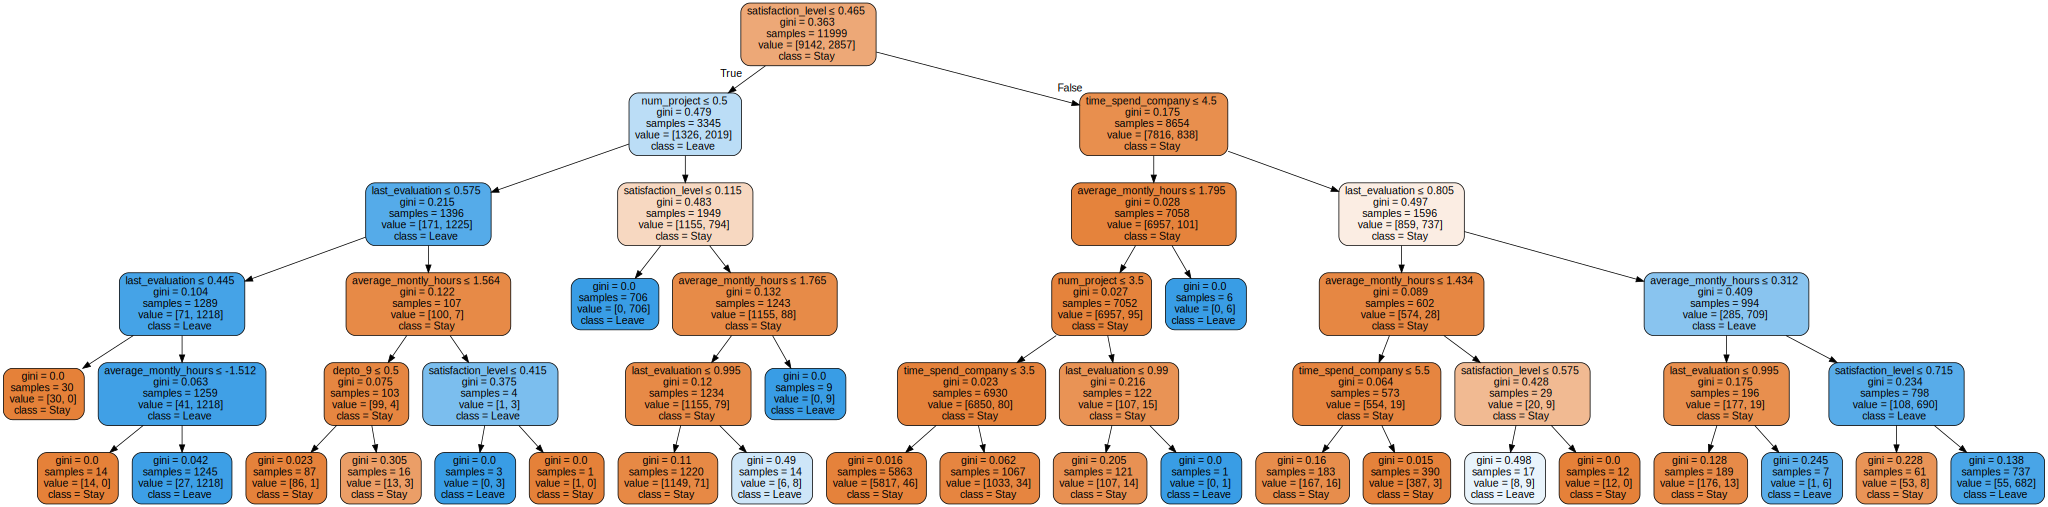

In [ ]:
import graphviz 


dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=df_train.columns,  
                     class_names=['Stay','Leave'],  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

##b) Qual é o Acerto do Modelo? Qual a Matriz de Confusão? Mostre o Cálculo da Acurácia? Verifique o Acerto dentro de cada grupo (Sensibilidade e Especificidade)

In [ ]:
df_test = pd.DataFrame(full_pipeline.fit_transform(X_test))

cols = ( ['average_montly_hours','salary','num_project','satisfaction_level','last_evaluation','time_spend_company'] 
       + [f'depto_{i}' for i in range(10)] 
       + [f'work_accident_{i}' for i in range(2)]
       + [f'promotion_last_5years_{i}' for i in range(2)] )

df_test.columns = cols
df_test.shape

(3000, 20)

In [ ]:
y_pred = clf.predict(df_test)

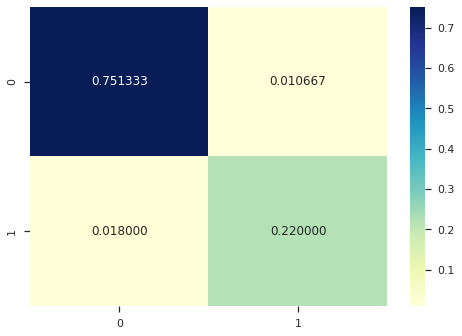

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, normalize='all')

sns.heatmap(cm, annot=True, fmt="f", cmap="YlGnBu")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2286
           1       0.95      0.92      0.94       714

    accuracy                           0.97      3000
   macro avg       0.97      0.96      0.96      3000
weighted avg       0.97      0.97      0.97      3000



#5) Segunda Técnica de Classificação: Regressão Logística

##a) Qual a saída do modelo de Regressão Logística:  Explique a saída.

##b) Como definimos as categorias/classes estimadas partir da estimativa da probabilidade para compor as duas classes de interesse? Qual o corte para esse estudo HR

##c) Qual é o Acerto do Modelo? Qual a Matriz de Confusão? Mostre o Cálculo da Acurácia? Verifique o Acerto dentro de cada grupo (Sensibilidade e Especificidade)

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(random_state=0, max_iter=1000).fit(df_train, y_train)
y_pred = log_reg.predict(df_test)

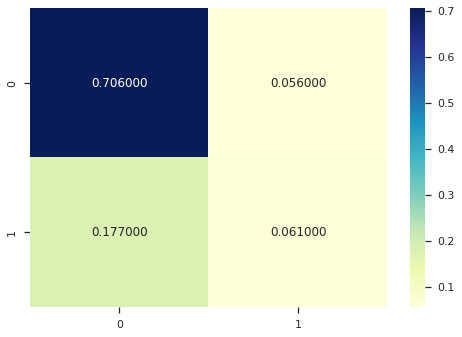

In [ ]:
cm = confusion_matrix(y_test, y_pred, normalize='all')

sns.heatmap(cm, annot=True, fmt="f", cmap="YlGnBu")

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      2286
           1       0.52      0.26      0.34       714

    accuracy                           0.77      3000
   macro avg       0.66      0.59      0.60      3000
weighted avg       0.73      0.77      0.74      3000



#6) Faça uma competição entre os modelos: Árvore de Decisão, Regressão Logística, SVM, KNN, Modelos de Esemble. 

In [ ]:
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

seed = 42
models = []
models.append(('GBC', GradientBoostingClassifier()))
models.append(('RFC', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

results = []
names = []
scoring = 'f1'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, df_train, y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)


GBC: 0.943785 (0.013398)
RFC: 0.979428 (0.007561)
KNN: 0.874243 (0.018426)
CART: 0.951982 (0.010989)
SVM: 0.889599 (0.017929)


##a) Indique o Algoritmo usado, a métrica que utilizará, e o desempenho do modelo

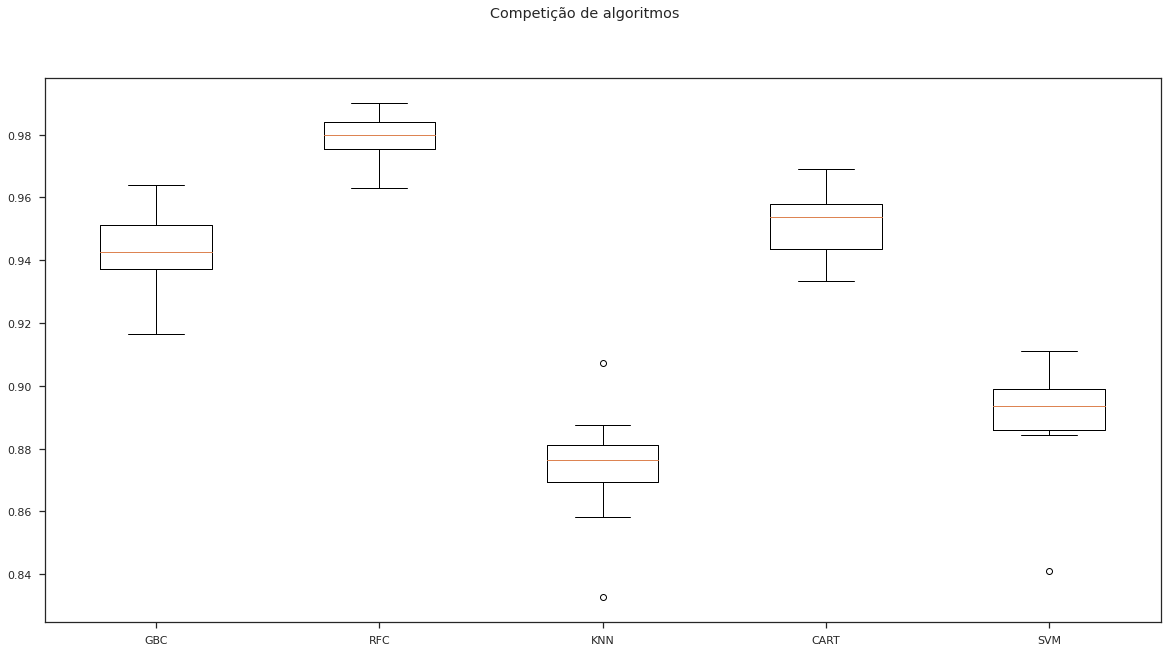

In [ ]:
fig = plt.figure(figsize=(20,10))
fig.suptitle('Competição de algoritmos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

##b) Qual a sua escolha.

Random Forest

#7) Utilize a base se dados HR_Abandono2021 somente as variáveis numéricas quantitativas crie segmentos de funcionários. Para cada resposta deixar a saída do programa.

In [ ]:
quant_abandono

,satisfaction_level,last_evaluation,average_montly_hours,left
id,,,,
1,0.38,0.53,157,1
2,0.80,0.86,262,1
3,0.11,0.88,272,1
4,0.72,0.87,223,1
5,0.37,0.52,159,1
...,...,...,...,...
14995,0.40,0.57,151,1
14996,0.37,0.48,160,1
14997,0.37,0.53,143,1


##a) Análise descritiva dessa base com foco no objetivo. Lembre-se de verificar se tem outliers. Indique os critérios de eliminação de outliers, se necessário.

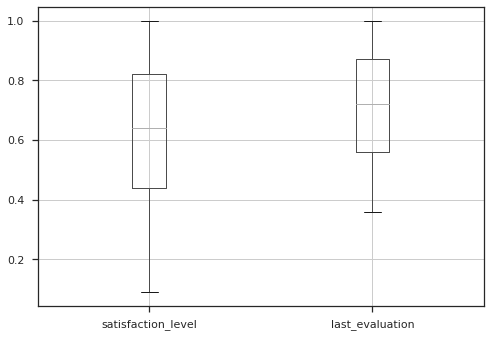

In [ ]:
quant_abandono[['satisfaction_level','last_evaluation']].boxplot()

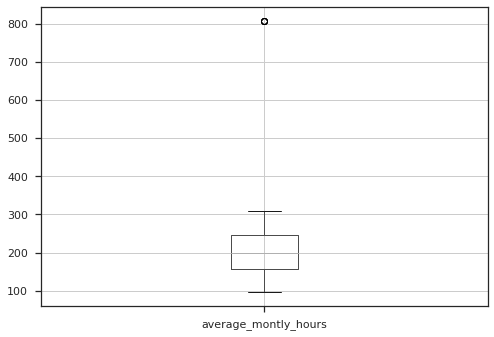

In [ ]:
quant_abandono[['average_montly_hours']].boxplot()

In [ ]:
Q3 = quant_abandono[['average_montly_hours']].quantile(q=0.75)
Q1 = quant_abandono[['average_montly_hours']].quantile(q=0.25)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5*IQR
upper_bound

average_montly_hours    378.5
dtype: float64

In [ ]:
outliers = quant_abandono['average_montly_hours'].loc[
                                                      quant_abandono['average_montly_hours']
                                                      .apply(lambda x: x > upper_bound.to_numpy()[0])
                                                      ].count()
f'Há {outliers} outliers no Dataset'

'Há 4 outliers no Dataset'

##b) Porque é necessário fazer a padronização das variáveis segmentadoras. Coloque a sumarização das variáveis padronizadas. 

Como utilizaremos a distância entre os vetores para segmentar os funcionários, se uma das features estiver em uma escala muito diferente das outras, então essa feature irá dominar o cálculo de distância e portanto enviesar a segmentação dos funcionários

In [ ]:
num_pipeline = Pipeline([
                         ('outliers', OutlierRemover()),
                         ('imputer', SimpleImputer(strategy='median')),
                         ('standard', StandardScaler())
])

full_pipeline = ColumnTransformer([
                     ("scaling", num_pipeline, ['satisfaction_level','last_evaluation','average_montly_hours'])
                  ])

df = pd.DataFrame(full_pipeline.fit_transform(original_abandono))
df.columns = ['satisfaction_level','last_evaluation','average_montly_hours']
df

,satisfaction_level,last_evaluation,average_montly_hours
0,-0.936495,-1.087275,-0.882003
1,0.752814,0.840707,1.221747
2,-2.022479,0.957554,1.422104
3,0.431041,0.899131,0.440354
4,-0.976716,-1.145699,-0.841931
...,...,...,...
14994,-0.856051,-0.853580,-1.002217
14995,-0.976716,-1.379394,-0.821896
14996,-0.976716,-1.087275,-1.162503
14997,-2.022479,1.424944,1.582390


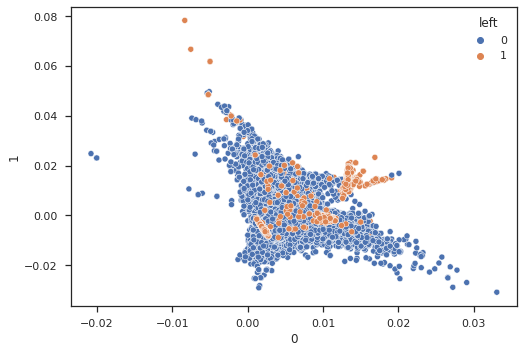

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10)
X2D = lle.fit_transform(df)
sns.scatterplot(data=pd.concat([pd.DataFrame(X2D), original_abandono['left'].reset_index(drop=True)], axis=1), x=0, y=1, hue='left')

##c) Qual a quantidade de clusters indicado pelo método de Elbow e com o Método Hierárquico

In [ ]:

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(df)
  
    distortions.append(sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / df.shape[0])
    inertias.append(kmeanModel.inertia_)
  
    mapping1[k] = sum(np.min(cdist(df, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / df.shape[0]
    mapping2[k] = kmeanModel.inertia_

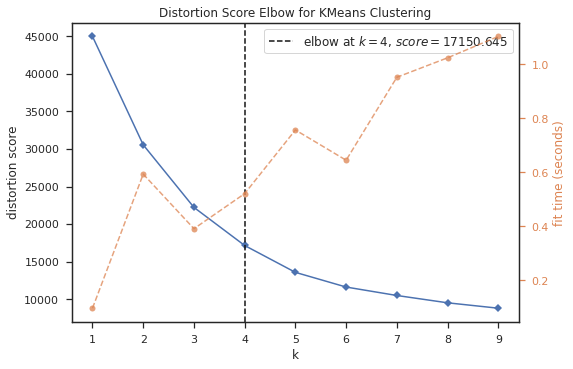

In [ ]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeanModel, k=(1,10))
visualizer.fit(df)
visualizer.show() 

A 4 grupos segundo o método Elbow

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

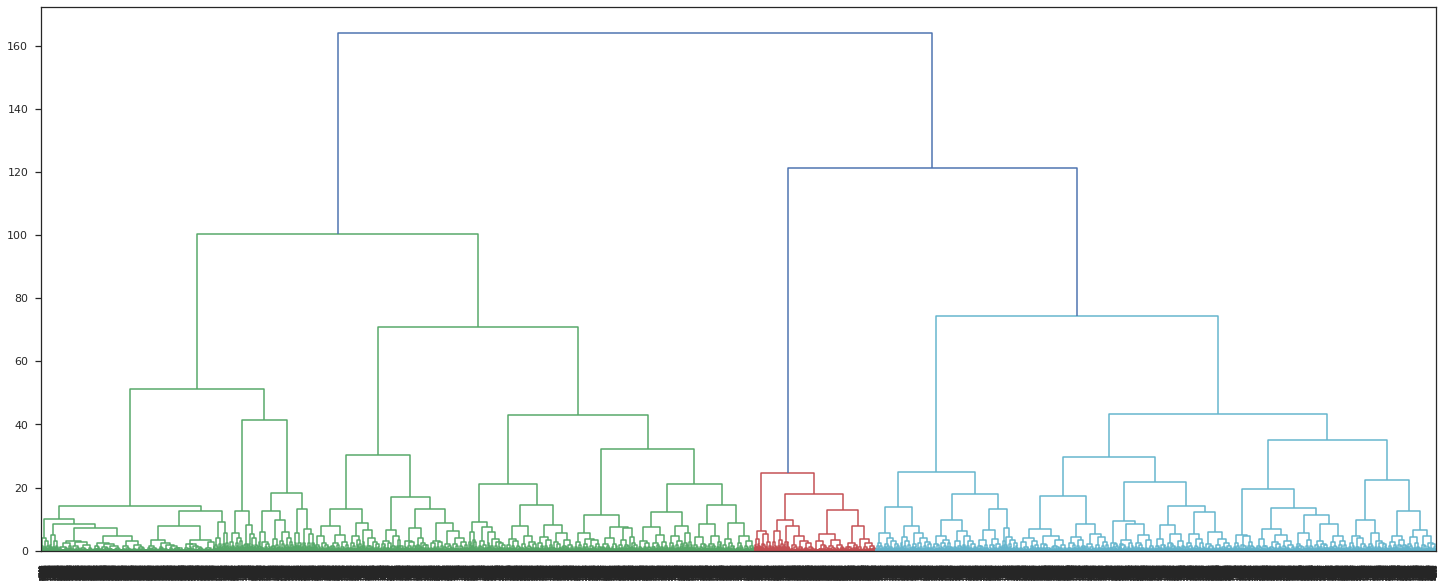

In [ ]:
Z = linkage(df, 'ward')
fig = plt.figure(figsize=(25, 10))
dn = dendrogram(Z)

O método hierárquico mostra que 4 segmentos de funcinários é um valor razoável.

##d) Utilizando o Método K-Means, qual a quantidade e percentual funcionários em cada cluster

In [ ]:
kmeanModel = KMeans(n_clusters=4)
kmeanModel.fit(df)


KMeans(n_clusters=4)

In [ ]:
segmentation = pd.concat([quant_abandono.reset_index(drop=True), 
                          pd.Series(np.argmin(cdist(df, kmeanModel.cluster_centers_, 'euclidean'), axis=1), name='cluster'),
                          abandono['salary'].reset_index(drop=True)
                          ], 
                         axis=1)
segmentation

,satisfaction_level,last_evaluation,average_montly_hours,left,cluster,salary
0,0.38,0.53,157,1,3,low
1,0.80,0.86,262,1,0,medium
2,0.11,0.88,272,1,1,medium
3,0.72,0.87,223,1,0,low
4,0.37,0.52,159,1,3,low
...,...,...,...,...,...,...
14994,0.40,0.57,151,1,3,low
14995,0.37,0.48,160,1,3,low
14996,0.37,0.53,143,1,3,low
14997,0.11,0.96,280,1,1,low


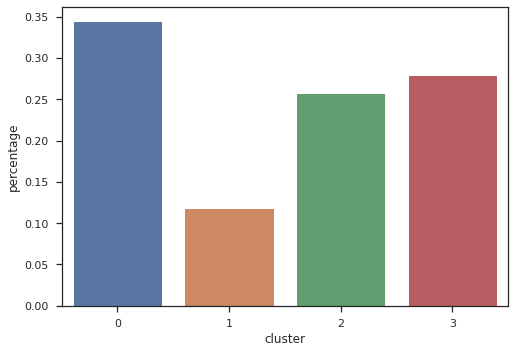

In [ ]:
group_perc = segmentation.groupby(by='cluster').apply(lambda g: g.count()['salary']/len(segmentation))
group_perc.name = 'percentage'
group_perc = group_perc.reset_index()
sns.barplot(data=group_perc, x='cluster', y='percentage')

* Grupo 0: Maior representatividade
* Grupo 1: Menor representatividade

##e) Qual o centróide dos clusters.   

In [ ]:
pd.DataFrame(kmeanModel.cluster_centers_, index=[f'cluster_{i}' for i in range(4)], columns=['x', 'y', 'z'])

,x,y,z
cluster_0,0.590980,0.972541,0.154989
cluster_1,-1.712027,0.658248,1.122885
cluster_2,0.611213,-0.646002,0.399414
cluster_3,-0.564233,-0.887266,-1.035033


##f) Como vcs interpretariam cada cluster. Descrever as características de cada cluster. 

In [ ]:
segmentation.iloc[:,:5].groupby(by='cluster').apply(lambda g: g.mean().iloc(axis=0)[:3])

,satisfaction_level,last_evaluation,average_montly_hours
cluster,,,
0,0.759758,0.882758,208.766731
1,0.187226,0.828770,258.381246
2,0.764786,0.605767,220.956680
3,0.472750,0.564197,149.359647


1. Os grupos 0 e 2 são muito similares: Altos valores de satisfação, média de horas mensais com valores medianos, porém o grupo 0 com possui o mais alto valor médio da última avaliação.
2. O grupo 1 apresenta a menor satisfação entre todos, apresenta o maior quantidade trabalhadas no mês e altas notas na última avaliação
3. O grupo 3 é o que apresenta menor valor de hosras mensais trabalhadas e de nota da última avaliação. A satisfação desse grupo não é alta, apenas mantém valores medianos.  

##g) A partir dos clusters criados volte na base inicial de funcionários e traga a informação se ele está ativo ou está desligado. Faça um cruzamento do cluster com a penetração de funcionários que já saíram da empresa (left=1). Quais análises ou considerações vocês podem tirar daqui.  

In [ ]:
segmentation.groupby(by='cluster').apply(lambda g: g.median().iloc(axis=0)[:4])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,satisfaction_level,last_evaluation,average_montly_hours,left
cluster,,,,
0,0.77,0.89,214.0,0.0
1,0.12,0.85,264.0,1.0
2,0.78,0.61,224.0,0.0
3,0.44,0.54,148.0,0.0


In [ ]:
segmentation.groupby(by='cluster').apply(lambda g: g.mean().iloc(axis=0)[:4])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



,satisfaction_level,last_evaluation,average_montly_hours,left
cluster,,,,
0,0.759758,0.882758,208.766731,0.182205
1,0.187226,0.828770,258.381246,0.534531
2,0.764786,0.605767,220.956680,0.020233
3,0.472750,0.564197,149.359647,0.381350


* O Grupo 1 é o segmento que apresenta maior chance de deixar a companhia

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



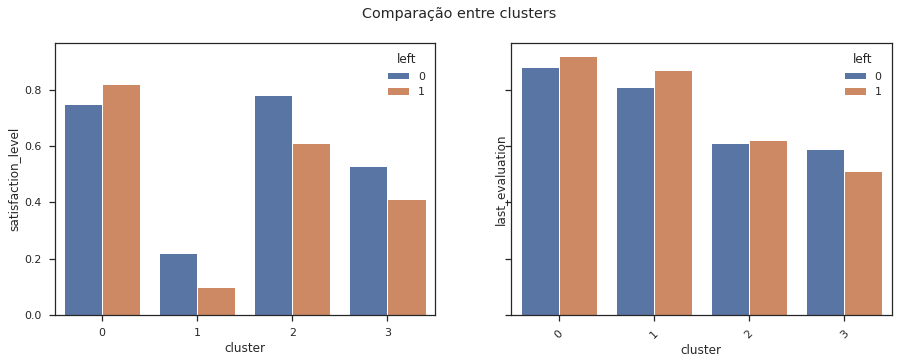

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
plt.xticks(rotation=45)
fig.suptitle('Comparação entre clusters')


for idx, col in enumerate(segmentation.iloc[:,:2].columns):
  norm1 = segmentation.groupby(by=['cluster','left']).apply(lambda g: g.median().iloc(axis=0)[:3])
  norm1 = norm1.reset_index(drop=False)
  sns.barplot(ax=axes[idx], x=norm1['cluster'], y=norm1[col], hue=norm1['left'])


O grupo 1, como visto anteriormente, apresenta o menor nível e satisfação, essa métrica é ainda maior dentre as pessoas que de fato saíram da companhia, porém curiosamente, o nota da última avaliação do grupo 1 e especialmente as pessoas que saíram da companhia apresentaram altos valores.  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



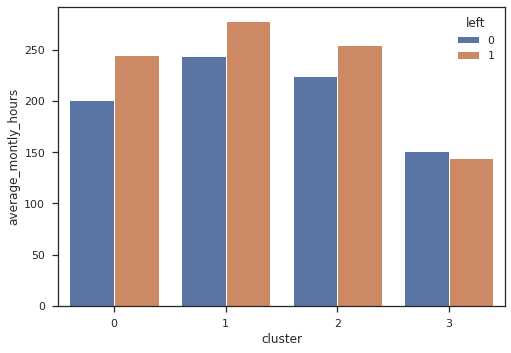

In [ ]:
col = 'average_montly_hours'
norm1 = segmentation.groupby(by=['cluster','left']).apply(lambda g: g.median().iloc(axis=0)[:3])
norm1 = norm1.reset_index(drop=False)
sns.barplot(x=norm1['cluster'], y=norm1[col], hue=norm1['left'])


* Grupo 1 é o segmento que apresenta maior média de horas tabalhadas no mês, as pessoas desse grupo que saíram trabalharam ainda mais que aquelas que não saíram.

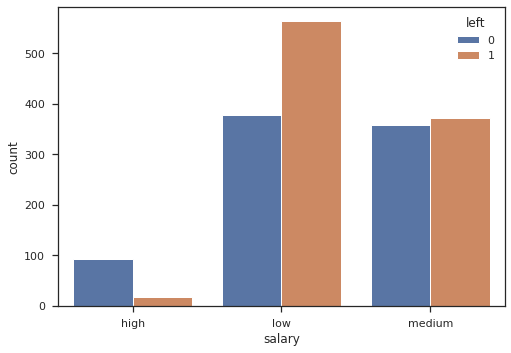

In [ ]:
salary = segmentation.groupby(by=['cluster','salary','left']).apply(lambda g: g.count())['satisfaction_level'].reset_index(drop=False)
salary.rename(columns={'satisfaction_level': 'count'}, inplace=True)
#Grupo1
sns.barplot(data=salary.loc[salary.cluster==1], x='salary', hue='left', y='count')

* No grupo 1, as pessoas que tendem a sair têm salários baixos ou médios, porém no último caso, com menor chance.

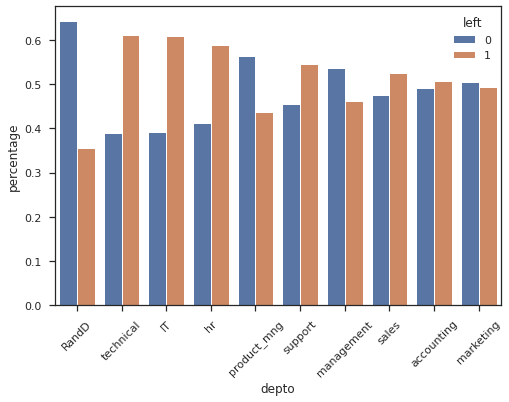

In [ ]:
#grupo1
depto_g1_sum = depto_g1.groupby(by='depto').sum()
depto_g1 = (pd.concat([segmentation, 
                      original_abandono['depto'].reset_index(drop=True)], axis=1)
          .groupby(by=['cluster','depto','left']).count()['salary'].loc(axis=0)[1, :, :])
depto_g1.name = 'percentage'

plt.xticks(rotation=45)
sns.barplot(data=depto_g1.groupby(by='depto').apply(lambda g: g/depto_g1_sum.loc[g.name]).reset_index().sort_values(by='percentage'), x='depto', hue='left', y='percentage')

* As áreas das quais os funcionários do grupo 1 saem da empresa são áreas técnicas, TI e HR

#Conclusão

* Ação tática:
    Para fazer um programa de retenção de funcionários é preciso focar nos funcionários dos departamentos de áreas técnicas, TI e HR, oferecendo maior compensação e ou menor carga horária de trabalho. 
    Fazer nova pesquisa para verificar se a satisfação desses funcionários aumentou.